# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

## Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [4]:
#To quickly inspect the columns within the dataframe
data.columns, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

(Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
        'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
        'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
        'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
        'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
        'direction_same', 'direction_opp', 'Y'],
       dtype='object'),
 None)

In [5]:
#To check the original size of the dataframe
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [6]:
#To inspect any missing data
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Detailed listing of all relevant parameters within the dataframe 
#Inspect data columns and uniques values

col_list = data.isnull().sum()
_shape = data.shape[0]
for col in range(len(col_list)):
    ratio = (col_list[col]/_shape)*100 #Missing data ratio
    if col_list[col]:
        print  ("****CONTAINS MISSING ELEMENTS****")
        print  ("Number of Missing Entries: ", col_list[col])
        print ("Ratio of Missing Data to Whole Data: ", ratio)
    print ("Column Name: ", col_list.index[col],
           "\nData Type: ", data[col_list.index[col]].dtype, 
           "\nElements: ", set(data[col_list.index[col]]))
    print ("##############################")
    

Column Name:  destination 
Data Type:  object 
Elements:  {'Work', 'Home', 'No Urgent Place'}
##############################
Column Name:  passanger 
Data Type:  object 
Elements:  {'Friend(s)', 'Kid(s)', 'Partner', 'Alone'}
##############################
Column Name:  weather 
Data Type:  object 
Elements:  {'Snowy', 'Rainy', 'Sunny'}
##############################
Column Name:  temperature 
Data Type:  int64 
Elements:  {80, 30, 55}
##############################
Column Name:  time 
Data Type:  object 
Elements:  {'7AM', '6PM', '10PM', '2PM', '10AM'}
##############################
Column Name:  coupon 
Data Type:  object 
Elements:  {'Bar', 'Restaurant(<20)', 'Coffee House', 'Restaurant(20-50)', 'Carry out & Take away'}
##############################
Column Name:  expiration 
Data Type:  object 
Elements:  {'2h', '1d'}
##############################
Column Name:  gender 
Data Type:  object 
Elements:  {'Male', 'Female'}
##############################
Column Name:  age 
Data Type:  ob

Based on ratios above, drop **'Car'** column and disregard/drop **NaN** entries from **'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50'** columns

In [8]:
data.drop(columns=['car'],inplace=True)
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],inplace=True)
data.shape

(12079, 25)

In [9]:
#Difference after data removal (Acceptable)
print("Percent Difference after data removal: ",round((((12684/ data.shape[0] )-1) * 100),2))

Percent Difference after data removal:  5.01


4. What proportion of the total observations chose to accept the coupon? 

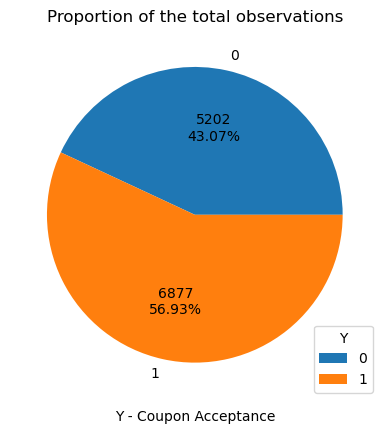

In [10]:
#label function for the pie chart
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.2f}%'

data.groupby("Y").size().plot(kind="pie", autopct=label_function)

plt.legend(title="Y",loc="lower right")
plt.title("Proportion of the total observations");
plt.xlabel("Y - Coupon Acceptance");

5. Use a bar plot to visualize the `coupon` column.

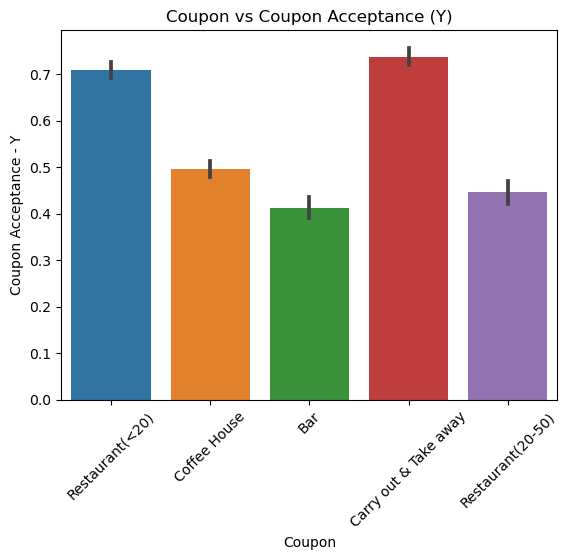

In [11]:
sns.barplot(data,x="coupon",y="Y");
plt.xticks(rotation=45);
plt.xlabel("Coupon")
plt.ylabel("Coupon Acceptance - Y");
plt.title("Coupon vs Coupon Acceptance (Y)");

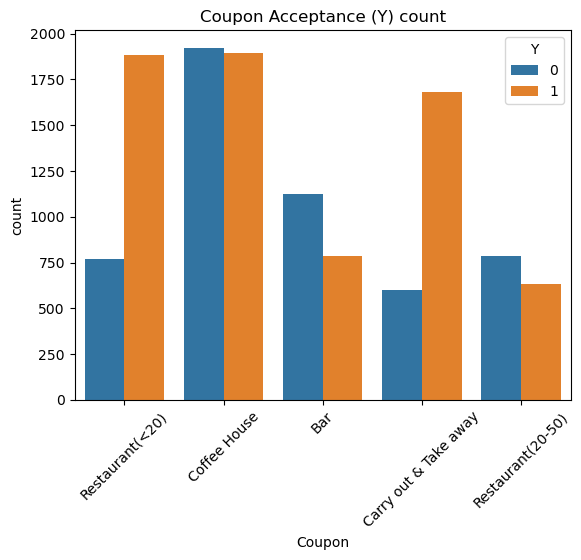

In [12]:
sns.countplot(data,x="coupon",hue="Y");
plt.xticks(rotation=45);
plt.xlabel("Coupon");
plt.title("Coupon Acceptance (Y) count");

6. Use a histogram to visualize the temperature column.

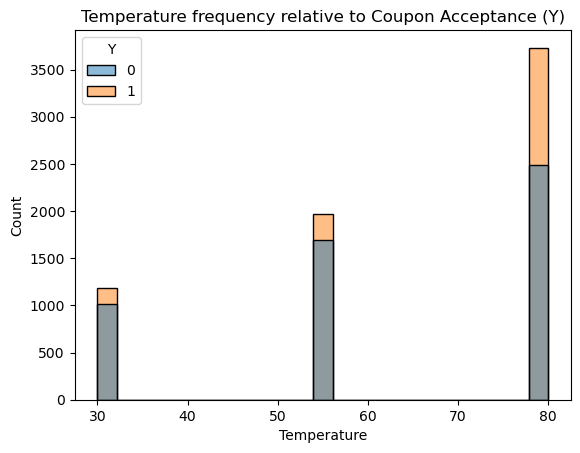

In [13]:
sns.histplot(data,x="temperature",hue="Y");
plt.xlabel("Temperature");
plt.title("Temperature frequency relative to Coupon Acceptance (Y)");

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
data_bar_coupons = data.query('coupon == "Bar"')
data_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


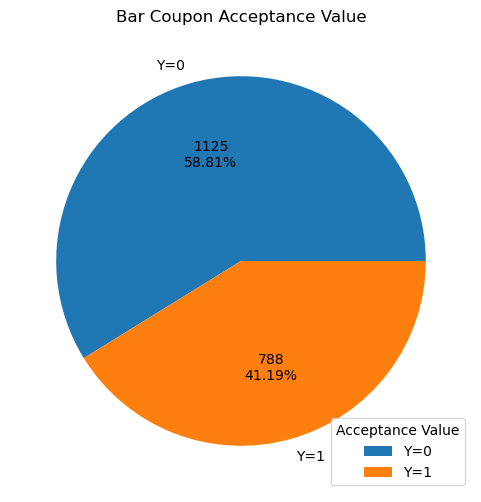

In [15]:
#label function for the pie chart
def label_function(val):
    return f'{val / 100* len(data_bar_coupons):.0f}\n{val:.2f}%'

#Data and visualization
fig, ax = plt.subplots(figsize=(6,6))
bar_coupon = data_bar_coupons.query('coupon=="Bar"').groupby(["coupon","Y"]).size()

fig1= pd.Series({'Y=0': bar_coupon[0], 'Y=1': bar_coupon[1] })
fig1.plot(ax = ax, kind="pie", autopct=label_function)

#Labels/Legend
plt.legend(title="Acceptance Value",loc="lower right")
plt.title("Bar Coupon Acceptance Value");

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


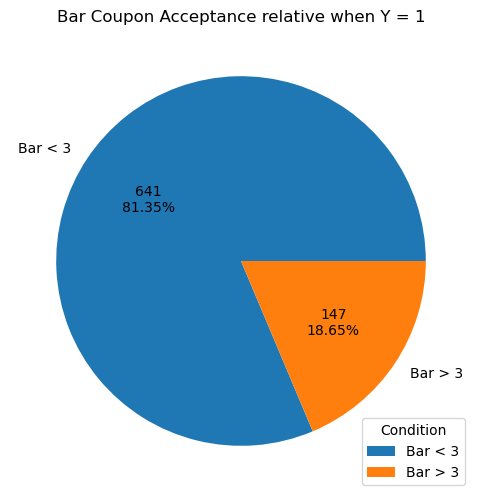

In [16]:
#Data initialization based on the conditions
list_lessthan_3 = ['1~3','less1', 'never']

count_lessthan_3 = data_bar_coupons.query('Bar in @list_lessthan_3 and Y==1').agg(sum)["Y"]
count_greaterthan3 = data_bar_coupons.query('Bar not in @list_lessthan_3 and Y==1').agg(sum)["Y"]
accept_rel_to_Y_1 = data_bar_coupons.query('coupon == "Bar" and Y==1')["Y"].sum()

fig2= pd.Series({'Bar < 3': count_lessthan_3, 'Bar > 3': count_greaterthan3 })

#label function for the pie chart
def label_function(val):
    return f'{val / 100 * accept_rel_to_Y_1:.0f}\n{val:.2f}%'

#Data and Visualization
fig,ax = plt.subplots(figsize=(6,6))
fig2.plot(ax=ax,kind="pie", autopct=label_function)

#Labels and Legend
plt.title("Bar Coupon Acceptance relative when Y = 1")
plt.legend(title="Condition",loc="lower right");

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


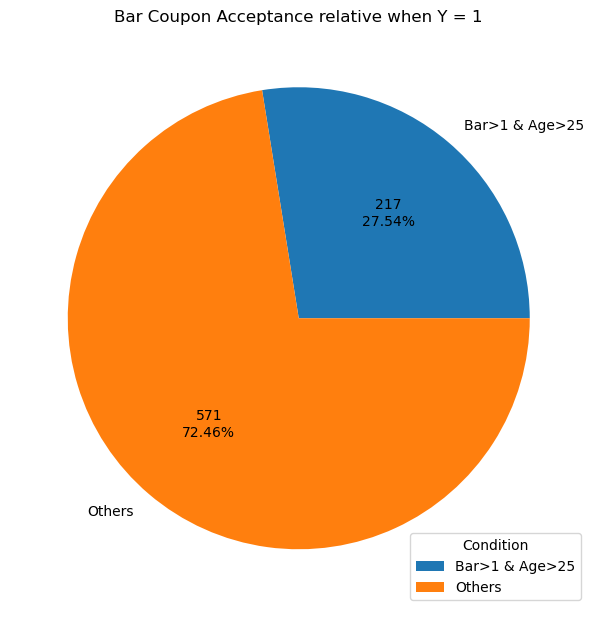

In [17]:
#Data initialization based on the conditions
list_bar_greaterthan_1 = ['gt8','4~8','1~3']
list_age_greaterthan_25 = ['50plus', '26', '36', '46', '41']

##De Morgan's Law
bar_grt3_age_gr25 = data_bar_coupons.query('Bar in @list_bar_greaterthan_1 and age in @list_age_greaterthan_25 and Y == 1').agg(sum)["Y"]
bar_ls3_age_ls25 = data_bar_coupons.query('Bar not in @list_bar_greaterthan_1 or age not in @list_age_greaterthan_25 and Y == 1').agg(sum)["Y"]
accept_rel_to_Y_1 = data_bar_coupons.query('Y==1')["Y"].sum()

fig3= pd.Series({'Bar>1 & Age>25': bar_grt3_age_gr25, 'Others': bar_ls3_age_ls25 })

#label function for the pie chart
def label_function(val):
    return f'{val / 100 * accept_rel_to_Y_1:.0f}\n{val:.2f}%'

#Data and Visualization
fig,ax = plt.subplots(figsize=(7.5,7.5))
fig3.plot(ax=ax,kind="pie", autopct=label_function)

#Labels and Legend
plt.title("Bar Coupon Acceptance relative when Y = 1")
plt.legend(title="Condition",loc="lower right");

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


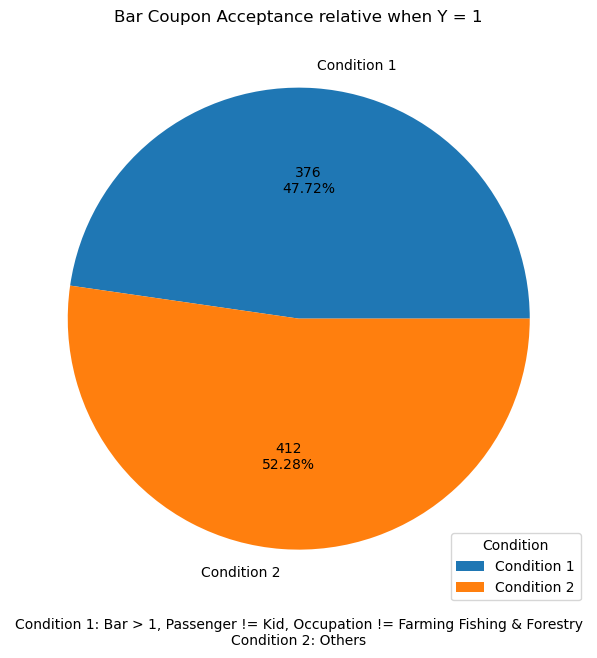

In [18]:
#Data initialization based on the conditions
list_bar_greaterthan_1 = ['gt8','4~8','1~3']
list_passengers = ['Kid(s)'] #Not
list_occupations = ['Farming Fishing & Forestry'] #Not

##De Morgan's Law
bar_grt3_pas_kid_occ_nfff = data_bar_coupons.query('Bar in @list_bar_greaterthan_1 and passanger not in @list_passengers and occupation not in @list_occupations and Y == 1').agg(sum)["Y"]
bar_grt3_pas_kid_occ_nfff_opp = data_bar_coupons.query('Bar not in @list_bar_greaterthan_1 or passanger in @list_passengers or occupation in @list_occupations and Y == 1').agg(sum)["Y"]
accept_rel_to_Y_1 = data_bar_coupons.query('Y==1')["Y"].sum()

fig4= pd.Series({'Condition 1': bar_grt3_pas_kid_occ_nfff, 'Condition 2': bar_grt3_pas_kid_occ_nfff_opp })

#label function for the pie chart
def label_function(val):
    return f'{val / 100 * accept_rel_to_Y_1:.0f}\n{val:.2f}%'

#Data and Visualization
fig,ax = plt.subplots(figsize=(7.5,7.5))
fig4.plot(ax=ax,kind="pie", autopct=label_function)

#Labels and Legend
plt.title("Bar Coupon Acceptance relative when Y = 1")
plt.xlabel("Condition 1: Bar > 1, Passenger != Kid, Occupation != Farming Fishing & Forestry\nCondition 2: Others")
plt.legend(title="Condition",loc="lower right");

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



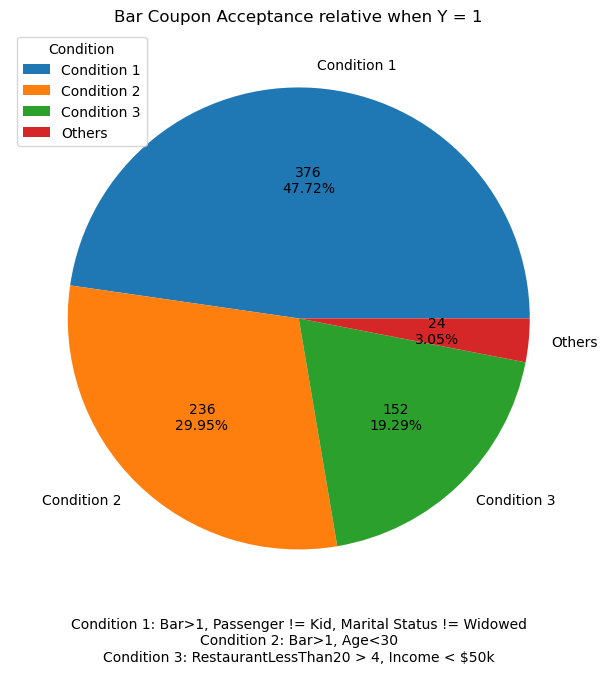

In [19]:
#Data initialization based on the conditions
list_bar_greaterthan_1 = ['gt8','4~8','1~3']
list_passengers = ['Kid(s)'] #Not
list_maritalStatus = ['Divorced', 'Married partner', 'Unmarried partner', 'Single']

list_age_under30 = ['26','21','below21']
list_restau_greaterthan_4 = ['4~8', 'gt8']
list_income = ['$37500 - $49999', 'Less than $12500', '$12500 - $24999', '$25000 - $37499']

condition_1 = data_bar_coupons.query('Bar in @list_bar_greaterthan_1 and passanger not in @list_passengers and maritalStatus in @list_maritalStatus and Y == 1').agg(sum)["Y"]
condition_2 = data_bar_coupons.query('Bar in @list_bar_greaterthan_1 and age in @list_age_under30 and Y == 1').agg(sum)["Y"]
condition_3 = data_bar_coupons.query('RestaurantLessThan20 in @list_restau_greaterthan_4 and income in @list_income and Y == 1').agg(sum)["Y"]
others = accept_rel_to_Y_1 - (condition_1 + condition_2 + condition_3)
accept_rel_to_Y_1 = data_bar_coupons.query('Y==1')["Y"].sum()

fig5= pd.Series({'Condition 1': condition_1, 'Condition 2': condition_2, 'Condition 3': condition_3, "Others":others })

#label function for the pie chart
def label_function(val):
    return f'{val / 100 * accept_rel_to_Y_1:.0f}\n{val:.2f}%'

#Data and Visualization
fig,ax = plt.subplots(figsize=(7.5,7.5))
fig5.plot(ax=ax,kind="pie", autopct=label_function)

#Labels and Legend
plt.xlabel("Condition 1: Bar>1, Passenger != Kid, Marital Status != Widowed\nCondition 2: Bar>1, Age<30\nCondition 3: RestaurantLessThan20 > 4, Income < $50k")
plt.title("Bar Coupon Acceptance relative when Y = 1")
plt.legend(title="Condition",loc="upper left");

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Conclusion

- There is a higher percentage of people not accepting Bar Coupon. 
    - `Delta is at 17.62%`
- The acceptance rate of people going less than 3 times monthly is more likely than more than 3 times monthly
    - `Acceptance rate at ~81%`
- Compared to all others who accepted the Bar Coupon, those who go to Bar once (1) monthly and over the age of 25 have a significant presence in the data set
    - `Acceptance rate at ~28%`
- The acceptance rate of people who went to the Bar once (monthly) and does not have a passenger kid has a significant presence in the data set
    - `Acceptance rate at ~48%`
    - `For this data sample, it is not affected by Age or Marital Status as the values are equal`
- An observation made is that Bar > 3 does not contain most of the data sample entries

***Based on this sampled data, Drivers who accepted the coupons could be hypothesized as follows:***
1. Bar < 3 contains most of data sample entries
2. Most drivers that go to the bar less than thrice (3) monthly is more likely to accept/use the coupon
3. Drivers are more likely to accept/use coupon if they have a Kid as a passenger


---

## Independent Investigation


Questions to explore:

**Core question: What are the best performing coupon groups?**

1. Are the coupon expiration dates effective?
2. What is the best time/season to release the coupons for marketing?
3. Who to send the coupons?
    - This is based on the following factors:
        - Income
        - Marital/Has Children
        - toCoupon 5/15/25/direction
        - Education
        - Gender
        - Age

#### Data Sanitization

In [20]:
#Create a new copy of the data set and sanitize for independent exploratory investigation
data_explo = data.copy()

data_explo["income"] = data_explo["income"].replace({"Less than \$12500": "$0 - $12499",
                                   "\$100000 or More":"More than 100000"},regex=True)
data_explo["time"] = data_explo["time"].replace({'10AM':'B - 10AM', '10PM':'E - 10PM', '2PM':'C - 2PM', '6PM':'D - 6PM', '7AM':'A - 7AM'},regex=True)
data_explo["age"] = data_explo["age"].replace({'50plus':'50+', 'below21':'0-21'},regex=True)
data_explo.rename(columns={"passanger":"passenger"},inplace=True);



In [21]:
data_explo.head(2)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,C - 2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,B - 10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [22]:
#Replace data to aid with a sorted visualization
data_explo["Bar"] = data_explo["Bar"].replace({'gt8':'8+', 'less1':'0', 'never':'0'},regex=True)
data_explo["CoffeeHouse"] = data_explo["CoffeeHouse"].replace({'gt8':'8+', 'less1':'0~1', 'never':'0'},regex=True)

data_explo["CarryAway"] = data_explo["CarryAway"].replace({'gt8':'8+', 'less1':'0~1', 'never':'0'},regex=True)

data_explo["RestaurantLessThan20"] = data_explo["RestaurantLessThan20"].replace({'gt8':'8+', 'less1':'0~1', 'never':'0'},regex=True)

data_explo["Restaurant20To50"] = data_explo["Restaurant20To50"].replace({'gt8':'8+', 'less1':'0~1', 'never':'0'},regex=True)

#Convert temperature from Fahrenheit to Celcius
def temp_conv_f_to_c(temp):
    return round(((temp - 32) * 5/9), 2)
data_explo["temperature"] = data_explo["temperature"].apply(temp_conv_f_to_c)

#### Question 1
- Are the coupon expiration dates effective?

In [23]:
#Initialize dataframe for Q1
data_q1 = data_explo[['coupon','expiration','Y']]

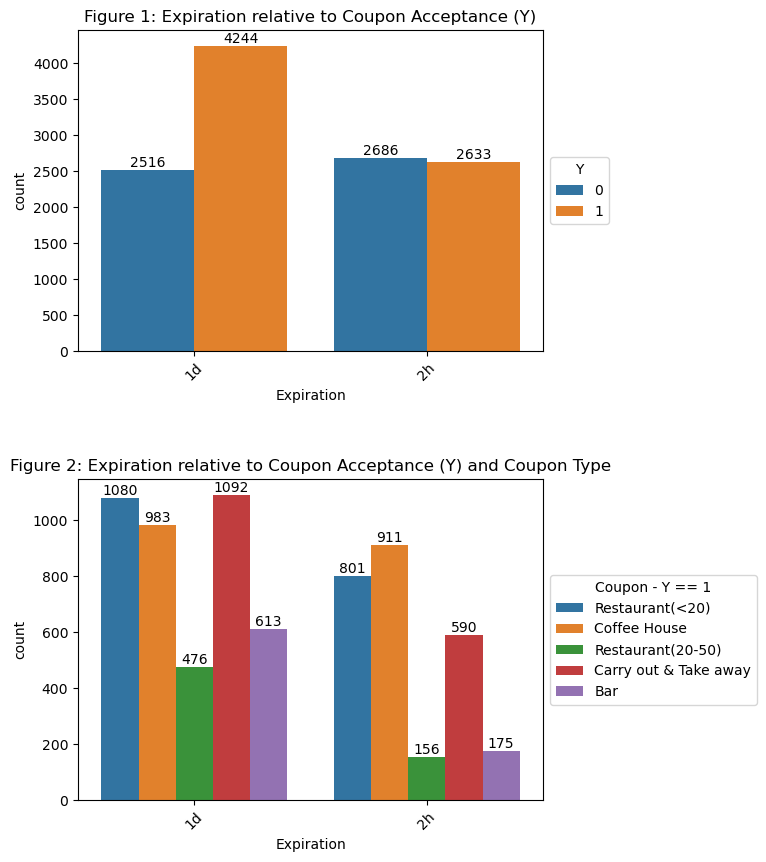

In [24]:
#Initialize X-axis parameters on graphs
i = "expiration"

#Initialize plot object
fig, ax = plt.subplots(2,1,figsize=(6,10))
fig.subplots_adjust(hspace=.4)

#Data visualization for fig 1
f1 = sns.countplot(ax=ax[0],data=data_q1.sort_values(i), x = i, hue="Y")

#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
    
#Labels and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.set_xlabel("Expiration")
f1.legend(title="Y",loc="center left", bbox_to_anchor=(1, 0.5))
f1.title.set_text("Figure 1: Expiration relative to Coupon Acceptance (Y)")

#Data visualization for fig 2
f2 = sns.countplot(ax=ax[1],data=data_q1.query('Y==1').sort_values(i), x = i, hue="coupon")

#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["coupon"]))):
    f2.bar_label(f2.containers[label])
    
#Labels and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.legend(title="Coupon - Y == 1",loc="center left", bbox_to_anchor=(1, 0.5));
f2.title.set_text("Figure 2: Expiration relative to Coupon Acceptance (Y) and Coupon Type")
f2.set_xlabel("Expiration");

#### Observations

- The longer the duration, the higher the chance of accepting the coupon
- There could be an optimum range in which a coupon expiration must be set 
    - Not enough data to establish this claim
- Coupon on interest can be established
    - `Restaurant(<20)`
    - `Coffee House`
    - `Carry out & Take away`


#### Question 2
- When is the best time/season to release the coupons for marketing and what type of coupon should it be?

In [25]:
#Initialize dataframe for Q2
data_q2 = data_explo[['weather', 'temperature', 'time','coupon','Y']]

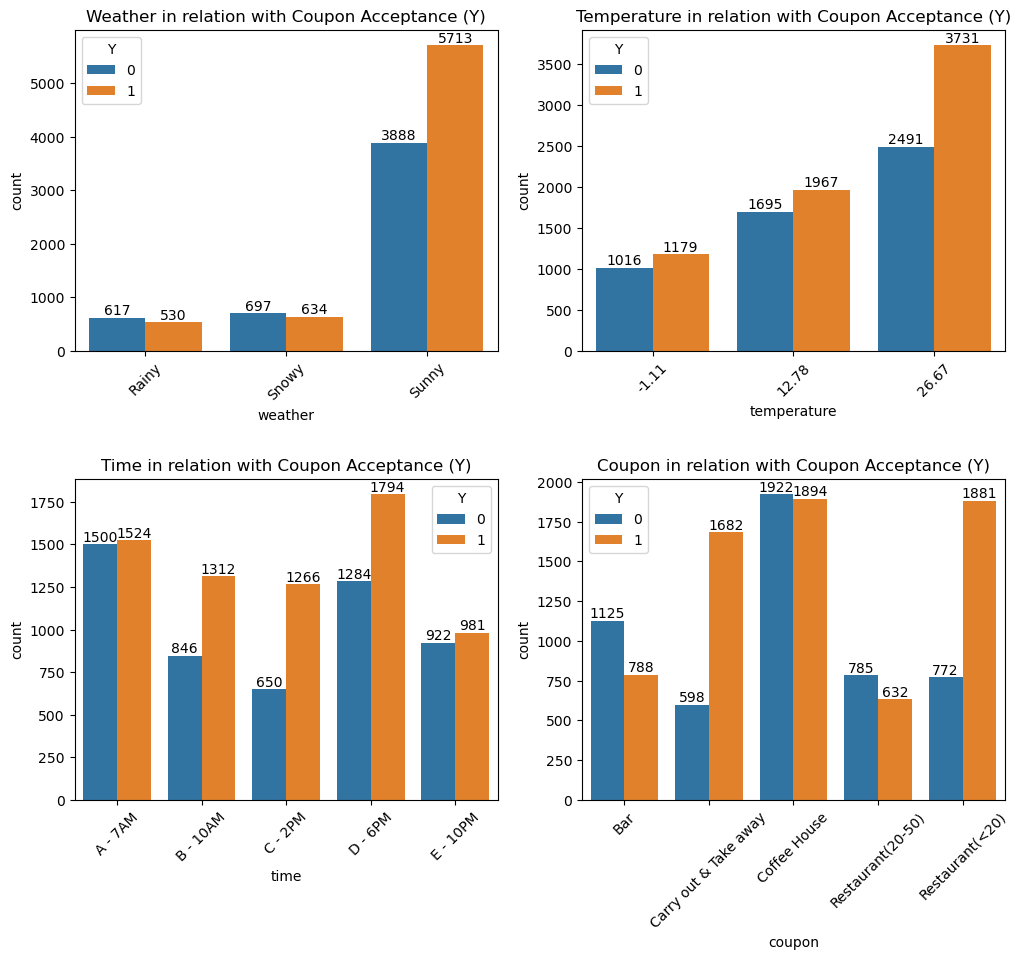

In [26]:
#Initialize plot object
fig, ax = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=.4)

#Loop into the data_q2 dataframe to plot selected features for analysis
ctr_y, ctr_x = 0, 0
for i in data_q2.columns[0:4]:
    #For plot object axis indexing
    if ctr_x < 2:
        f1 = sns.countplot(ax=ax[ctr_y,ctr_x],data=data_q2.sort_values(i), x = i, hue="Y")
        #Iterate through each each HUE parameter to display count value on top of the bar
        for label in range(len(set(data_explo["Y"]))):
            f1.bar_label(f1.containers[label])
        head = str(i).capitalize() + " in relation with Coupon Acceptance (Y)"
        f1.title.set_text(head)
        f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
        ctr_x += 1
    #For plot object axis indexing
    if ctr_x == 2:
        ctr_y += 1
        ctr_x = 0   
        

#### Observations

- The sunny weather has the most entries related to coupon acceptance
- The higher the temperature, the more coupon acceptance activities found
- There is a high acceptance rate (relative to non acceptance) for entries between 10 AM to 6 PM
- The highest coupon count (both accepted and/or not) are as follows:
    - `Restaurant(<20)`
    - `Coffee House`
    - `Carry out & Take away`

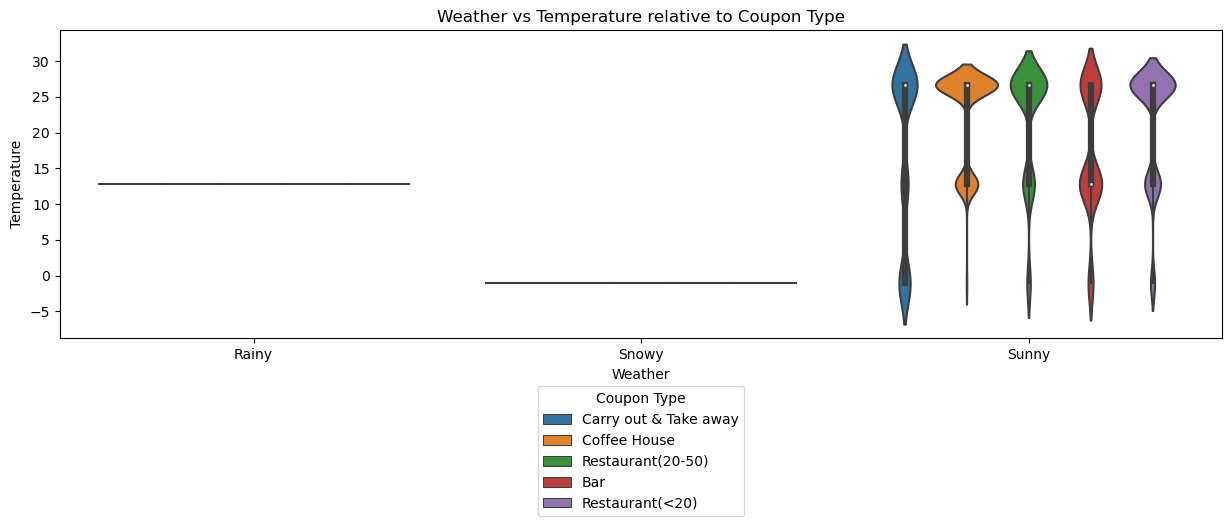

In [27]:
#Initialize plot object
fig,ax = plt.subplots(figsize=(15,4))

#Data visualization and Labels/Legend
f1 = sns.violinplot(data_q2.query('Y==1').sort_values("weather"), x= "weather", y= "temperature", hue="coupon")
f1.legend(title = "Coupon Type", loc = "lower center", bbox_to_anchor=(0.5,-0.6))
f1.set_xlabel("Weather")
f1.set_ylabel("Temperature")
plt.title("Weather vs Temperature relative to Coupon Type");


In [28]:
#Further investigation related to Rainy and Snowy Weather categories.
rainy_entries = set(data_q2.query('weather=="Rainy"').sort_values("weather")["temperature"])
snowy_entries = set(data_q2.query('weather=="Snowy"').sort_values("weather")["temperature"])
rainy_entries, snowy_entries



({12.78}, {-1.11})

**This implies that data is limited to only be correlated mostly during the `Sunny` season**

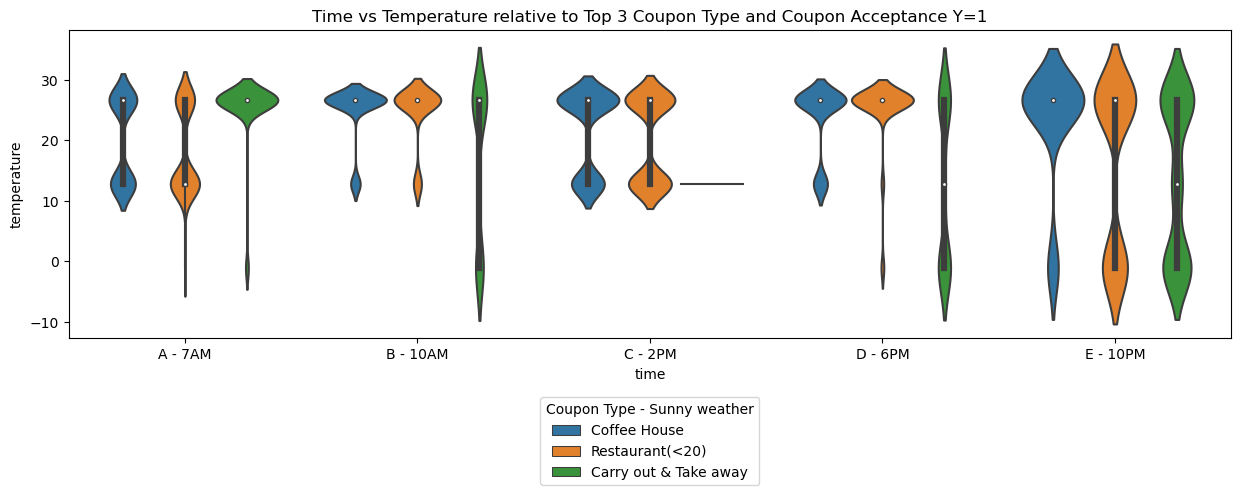

In [29]:
#Exploring the Top 3 coupon (accepted) categories observed above on a Sunny weather

#Initialize Top 3 coupon categories
list_coupon = ['Coffee House', 'Carry out & Take away', 'Restaurant(<20)']

#Data visualization and legend
fig,ax = plt.subplots(figsize=(15,4))
f1 = sns.violinplot(data_q2.query('weather == "Sunny" and Y==1 and coupon in @list_coupon').sort_values("time"), x= "time", y= "temperature", hue="coupon")
f1.legend(title = "Coupon Type - Sunny weather",loc = "lower center", bbox_to_anchor=(0.5,-0.5));
plt.title("Time vs Temperature relative to Top 3 Coupon Type and Coupon Acceptance Y=1");

#### Observations

- `Coffee House` and `Restaurant(<20)` have similar distribution characteristics relative to both time and temperature on a `Sunny` day
- `Coffee House` and `Restaurant(<20)` visits are more frequent between 7AM to 10PM on a warm temperature
    - After 6 PM, visits for these parameters are also seen during the cold temperature range
- `Carry out & Take away` is more prevalent all throughout the day regardless of temperature
- For `Carry out & Take away`, there is not much data (for `time = 2PM`) similar to a scenario from an earlier observation regarding `Rainy` and `Snowy` weather

#### Question 3
- Who to send the Top 3 coupons (`Coffee House`, `Restaurant(<20)` and `Carry out & Take away`)?
    - This is based on the following factors:
        - Gender
        - Age
        - Marital/Has Children
        - Income
        - Education


In [30]:
#Reinitialize Top 3 coupons
list_coupon = ['Coffee House', 'Carry out & Take away', 'Restaurant(<20)']

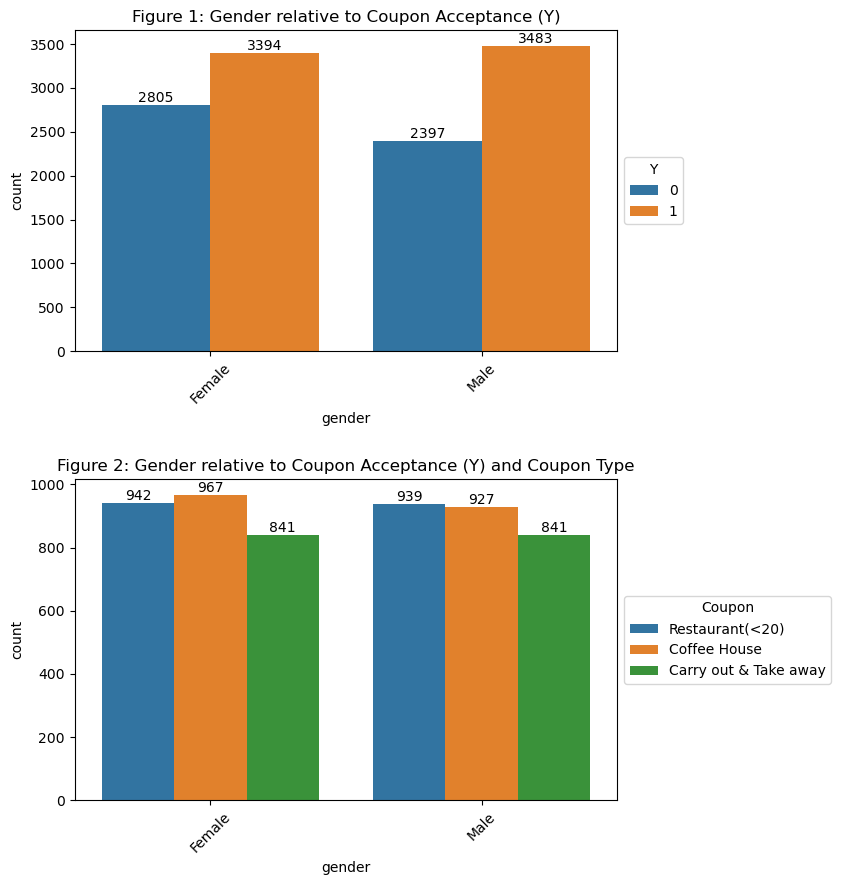

In [31]:
#Initialize plot object
fig, ax = plt.subplots(2,1,figsize=(7,10))
fig.subplots_adjust(hspace=.4)

#Plot Gender parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "gender"
f1 = sns.countplot(ax=ax[0],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
#Data visualization and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.legend(loc="lower left", title = "Y")
f1.legend(title = "Y",loc = "center left", bbox_to_anchor=(1,0.5));
f1.title.set_text("Figure 1: Gender relative to Coupon Acceptance (Y)")

f2 = sns.countplot(ax=ax[1],data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f2.bar_label(f2.containers[label])
#Data visualization and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.title.set_text("Figure 2: Gender relative to Coupon Acceptance (Y) and Coupon Type")
f2.legend(title = "Coupon",loc = "center left", bbox_to_anchor=(1,0.5));



#### Observations

- `Gender` is not a very significant factor on the acceptance rate of coupons

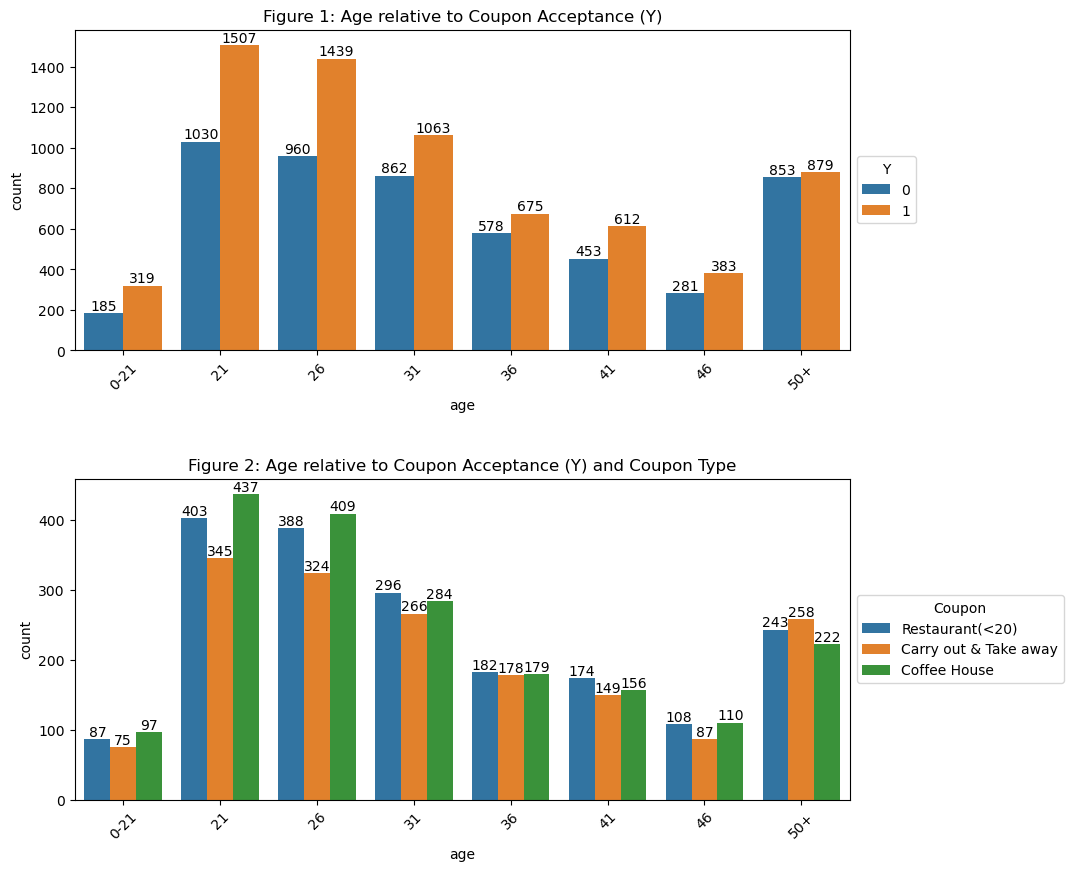

In [32]:
#Initialize plot object
fig, ax = plt.subplots(2,1,figsize=(10,10))
fig.subplots_adjust(hspace=.4)

#Plot Age parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "age"
f1 = sns.countplot(ax=ax[0],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
#Data visualization and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.title.set_text("Figure 1: Age relative to Coupon Acceptance (Y)")
f1.legend(title = "Y",loc = "center left", bbox_to_anchor=(1,0.5));

f2 = sns.countplot(ax=ax[1],data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f2.bar_label(f2.containers[label])
#Data visualization and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.title.set_text("Figure 2: Age relative to Coupon Acceptance (Y) and Coupon Type")
f2.legend(title = "Coupon",loc = "center left", bbox_to_anchor=(1,0.5));

#### Observations

- `Age` is a significant factor as the frequency of coupon acceptance is high between the age of **21 and 31** and goes higher at **50+**

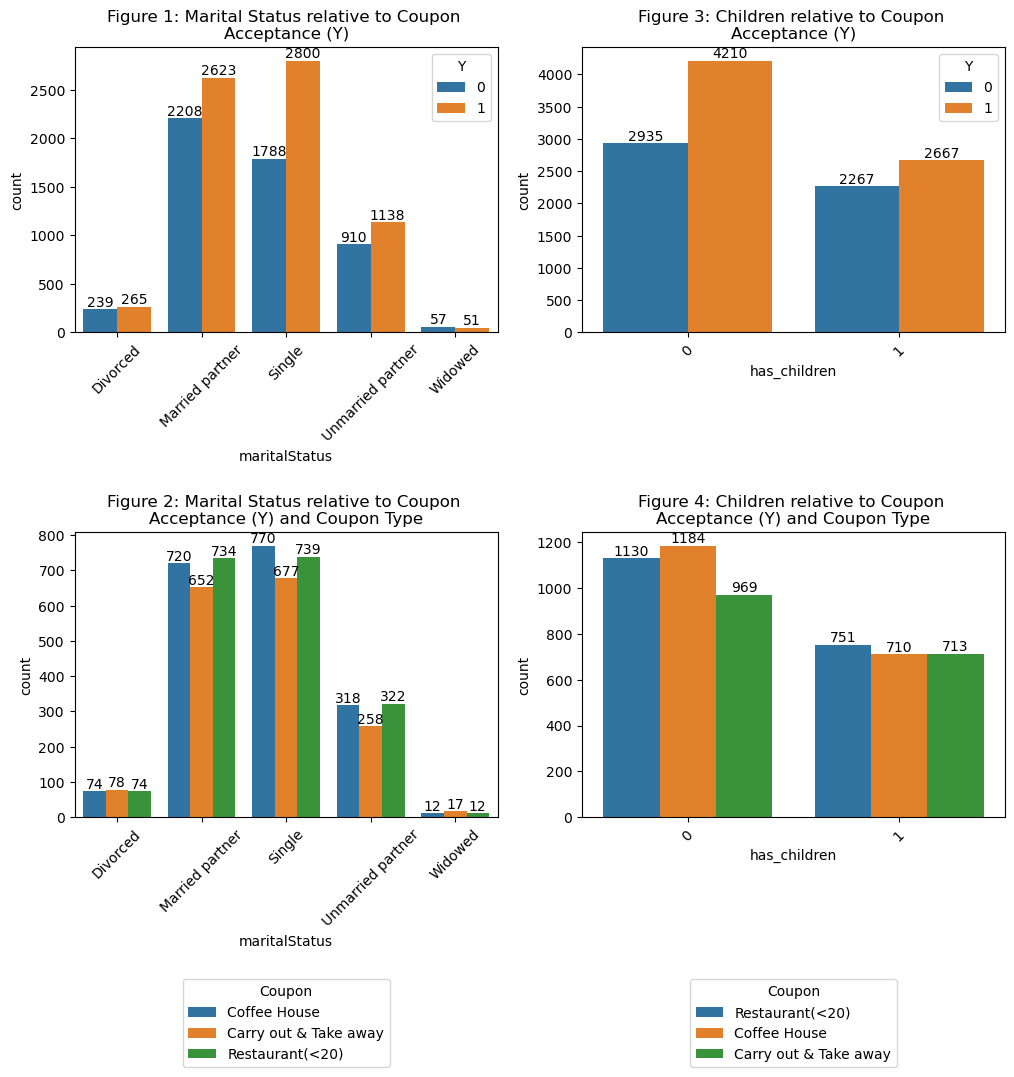

In [33]:
#Initialize plot object
fig, ax = plt.subplots(2,2,figsize=(12,10))
fig.subplots_adjust(hspace=.7)

#Plot Marital Status parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "maritalStatus"
f1 = sns.countplot(ax=ax[0,0],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
#Data visualization and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.title.set_text("Figure 1: Marital Status relative to Coupon \nAcceptance (Y)")
f1.legend(loc="upper right", title = "Y")

f2 = sns.countplot(ax=ax[1,0],data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f2.bar_label(f2.containers[label])
#Data visualization and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.title.set_text("Figure 2: Marital Status relative to Coupon \nAcceptance (Y) and Coupon Type")
f2.legend(title = "Coupon",loc = "lower center", bbox_to_anchor=(0.5,-0.9));


#########################

#Plot Has Children parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "has_children"
f3 = sns.countplot(ax=ax[0,1],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f3.bar_label(f3.containers[label])
#Data visualization and legend
f3.set_xticklabels(f3.get_xticklabels(),rotation=45)
f3.title.set_text("Figure 3: Children relative to Coupon \nAcceptance (Y)")
f3.legend(loc="upper right", title = "Y")

f4 = sns.countplot(ax=ax[1,1],data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f4.bar_label(f4.containers[label])
#Data visualization and legend
f4.set_xticklabels(f4.get_xticklabels(),rotation=45)
f4.title.set_text("Figure 4: Children relative to Coupon \nAcceptance (Y) and Coupon Type")
f4.legend(title = "Coupon",loc = "lower center", bbox_to_anchor=(0.5,-0.9));

#### Observations

- `Marital Status` is a significant factor as the frequency of coupon acceptance is high among `Single`, `Unmarried`, and `Married Partners`
- There is a higher frequency of coupon acceptance if the consumer **has no children**.

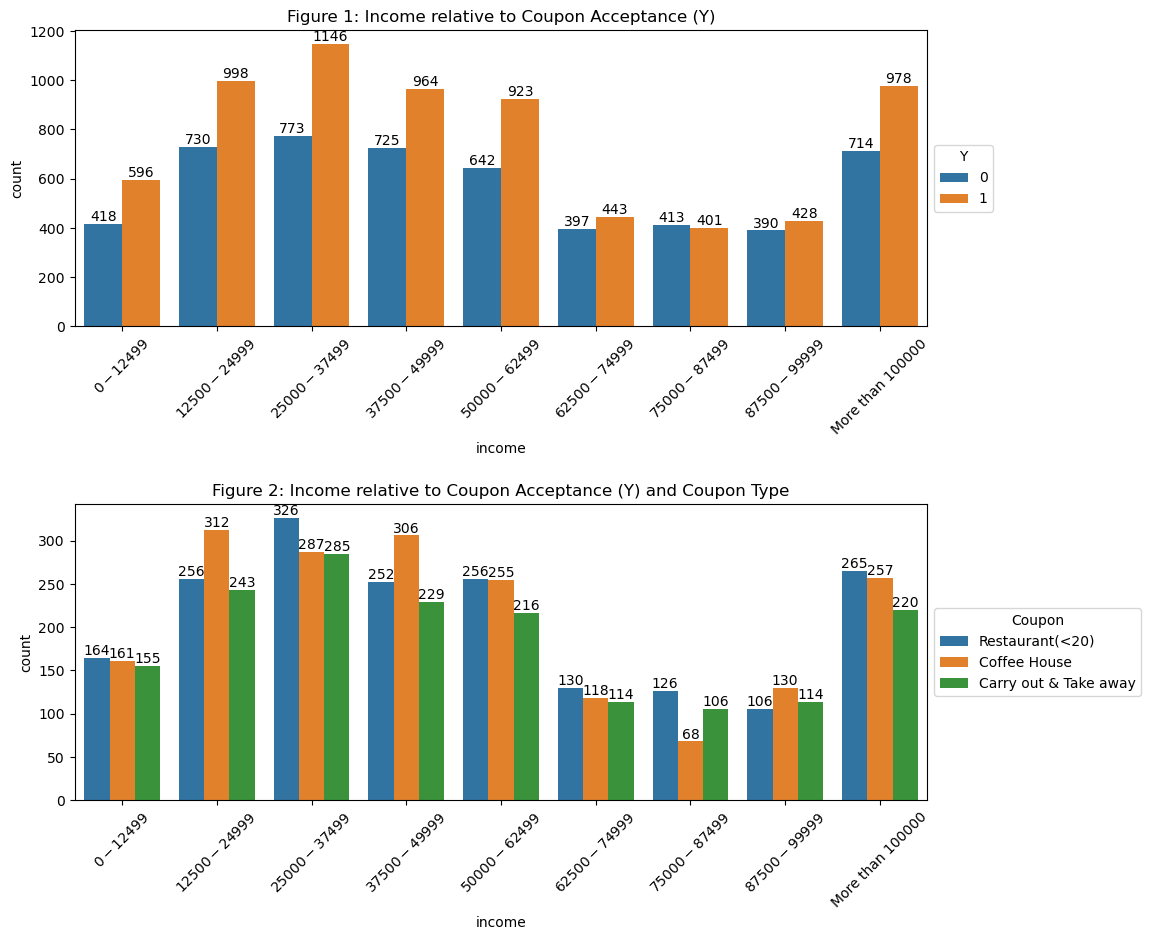

In [34]:
#Initialize plot object
fig, ax = plt.subplots(2,1,figsize=(11,10))
fig.subplots_adjust(hspace=.6)

#Plot Income parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "income"
f1 = sns.countplot(ax=ax[0],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
#Data visualization and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.legend(loc="lower left", title = "Y")
f1.title.set_text("Figure 1: Income relative to Coupon Acceptance (Y)")
f1.legend(title = "Y",loc = "center left", bbox_to_anchor=(1,0.5));

f2 = sns.countplot(ax=ax[1],data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f2.bar_label(f2.containers[label])
#Data visualization and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.title.set_text("Figure 2: Income relative to Coupon Acceptance (Y) and Coupon Type")
f2.legend(title = "Coupon",loc = "center left", bbox_to_anchor=(1,0.5));



#### Observations

- `Income` is a significant factor as the frequency of coupon acceptance is considerably higher below `$62,500` and above `$100,000`
- It is interesting to find that if somebody is earning more than `$100,000`, their spending behaviour changes such that they would maximize their income by accepting coupons.

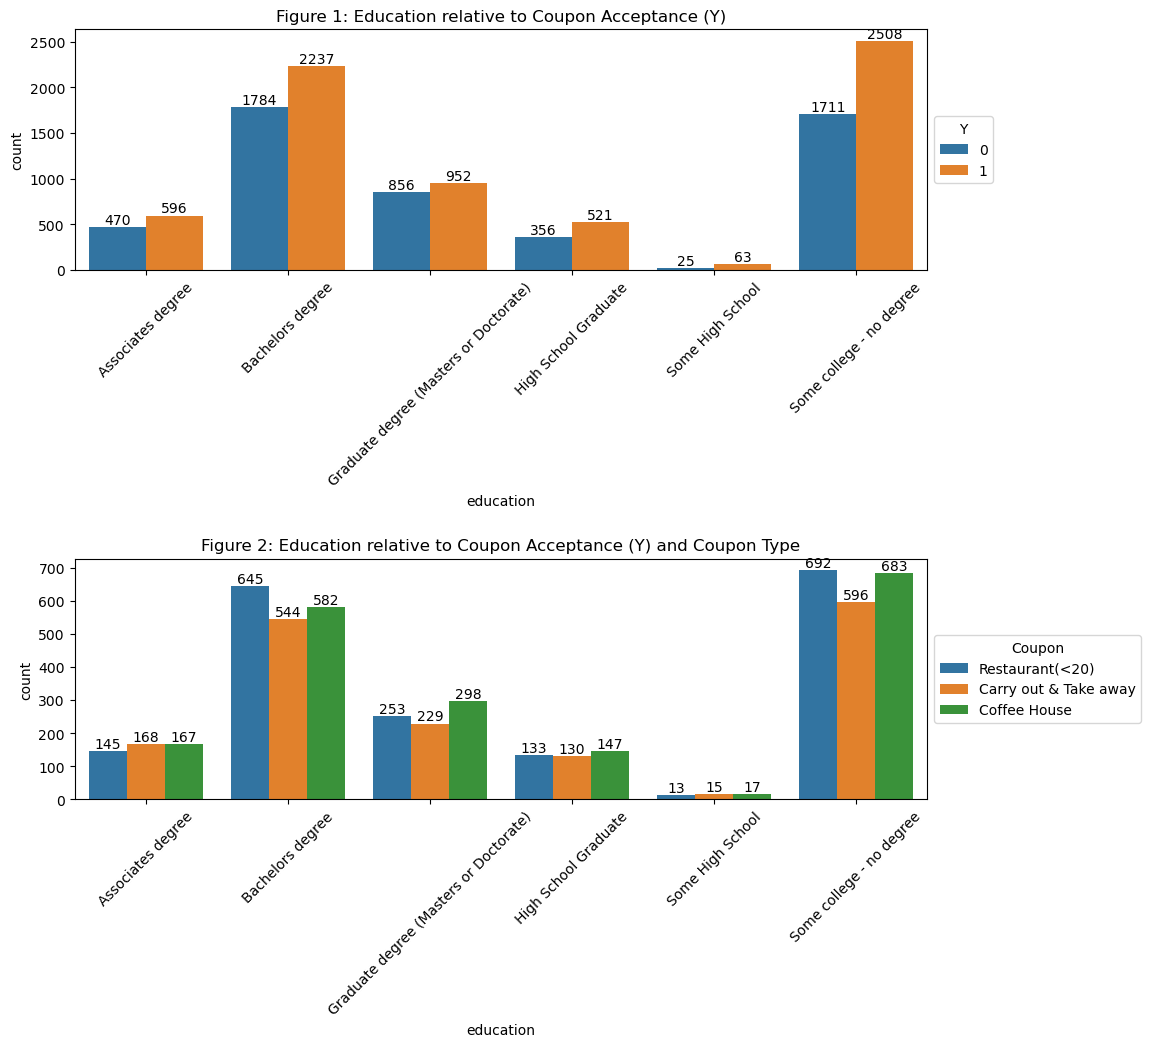

In [35]:
#Initialize plot object
fig, ax = plt.subplots(2,1,figsize=(11,10))
fig.subplots_adjust(hspace=1.2)

#Plot Education parameter by plotting based on Coupon acceptance and Accepted Coupon distribution
i= "education"
f1 = sns.countplot(ax=ax[0],data=data_explo.sort_values(i), x = i, hue="Y")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(set(data_explo["Y"]))):
    f1.bar_label(f1.containers[label])
#Data visualization and legend
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f1.legend(loc="lower left", title = "Y")
f1.title.set_text("Figure 1: Education relative to Coupon Acceptance (Y)")
f1.legend(title = "Y",loc = "center left", bbox_to_anchor=(1,0.5));

f2 = sns.countplot(ax=ax[1]
                   ,data=data_explo.query('Y==1 and coupon in @list_coupon').sort_values(i), x = i, hue="coupon")
#Iterate through each each HUE parameter to display count value on top of the bar
for label in range(len(list_coupon)):
    f2.bar_label(f2.containers[label])
#Data visualization and legend
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.title.set_text("Figure 2: Education relative to Coupon Acceptance (Y) and Coupon Type")
f2.legend(title = "Coupon",loc = "center left", bbox_to_anchor=(1,0.5));



#### Observations

- `Education` is a significant factor as the frequency of coupon acceptance is considerably higher for consumers with No Degree and have Bachelor's Degree
    - Looking at the first figure above, it appears that the data is biased for this parameter as each category does not have enough information to provide a more reliable prediction.

---

# Findings/Conclusion

***Based on the sampled data and the overall results of this analysis from Q1 to Q3, the following assertions can be made:**
1. The Coupon types that have the best performance (based on analyzed features) are the following:
    - `Restaurant(<20)`
    - `Coffee House`
    - `Carry out & Take away`
2. The `higher the Coupon validity duration`, the higher chance that consumers will accept the coupon
    - A likely scenario is if the expiry is too long, the acceptance rate will decrease
        - The condition above most likely have an ideal threshold/range to maintain a positive acceptance rate
        - There is not enough data to predict this parameter
3. The data set provided for this activity contains useful information to predict consumer behaviour in a `Sunny` weather
    - There is a positive correlation between temperature and coupon acceptance
4. For the best performing Coupon groups, it is ideal to offer them between `10 AM to 6 PM` as a high coupon acceptance were observed
5. `Cheap Restaurants and Coffee House` have similar characteristics relative to time and temperature on a Sunny day
    - Visits are more frequent before noon (7AM to 10PM) on a warm temperature
    - After 6 PM, visits for these parameters are also seen during the cold temperature range
6. `Carry out & Take way` is not dependent on temperature
7. To maximize potential profit, any marketing campaign related to these best perfoming coupons should primarily target the following consumers:
    - Age between `21-31` and `50+`
    - Marital Status of `Single, Unmarried, and Married Partners`
    - `No Children`
        - It would be interesting to explore/confirm if this parameter's acceptance rate is indeed higher when driving with Kids
    - Income is below `$62,500` and above `$100,000`


# Recommendation

1. Consider that the following types of establishments will generate the most coupon acceptance rate and leverage this knowledge to the owner's advantage
    - `Restaurant(<20)`
    - `Coffee House`
    - `Carry out & Take away`
2. Use the **predicted parameters** above to improve success rates of Coupon marketing campaigns
3. Gather more data related to coupon acceptance in other weather/time conditions to create a full view of which businesses are running successful campaigns.
4. Explore the Trip Attributes in relation with Coupon and User Attributes as this was not incorporated on this analysis.